<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 9

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn import datasets
MAX_ITERATIONS = 100

## Introduction:
Say you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

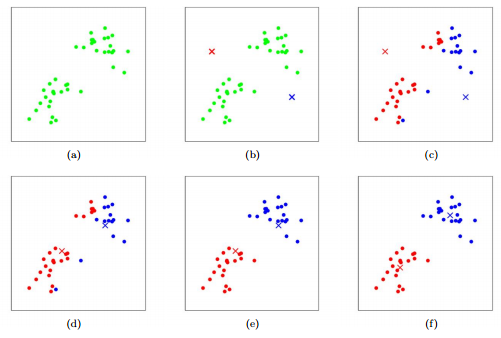

Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan

## Exercise 1: K-an You Do It? Yes You Can!

In the clustering problem, we are given a training set {x_1, x_2, ... x_m} and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point, x_i which real-values, as usual; but no labels y_i (making this an unsupervised learning problem). Our goal is to predict k centroids and a label c_i for each datapoint. The prediction, c_i is a cluster assignment for x_i . At a high level, the k-means clustering algorithm is as follows:



1.   Initialize **cluster centroids** $μ_1, μ_2, μ_3,....μ_k ∈ ℝ^n$ randomly
2.   Repeat until convergence: {


> For every i, set
>> $c^{(i)}:=arg \underset{j}{min} ||x^{(i)} - μ_j ||^2 $

> For every j, set
>> $μ_j := \frac{∑_{i=1}^m 1 \{c^{(i)} = j\} x^{(i)} }{∑_{i=1}^m 1 \{c^{(i)} = j\}} $

}




Functions to Implement:
*   Get Number of Features
*   Get Centroids
*   Get Random Centroids
*   Should Stop
*   Get Labels
*   K Means

### Function: Get Number of Features
Returns the number of features in the dataset. This corresponds to the number of columns in your dataSet array

In [2]:
def getNumFeatures(dataSet):
  # Find the number of features in the dataset
  numFeatures = len(dataSet[0])
  return numFeatures

### Function: Get Centroids
Returns k random centroids, each of dimension n. Each centroid is the geometric mean of the points that have that centroid's label. 

**Important**: If a centroid is empty (no points have that centroid's label) you should ramdonly re-initialize it.

In [3]:
def getCentroids(dataSet, labels, k):
  #Compute/randomly initialize centroids
  centroids = []
  dict_label_to_points = {}
  for i, label in enumerate(labels):
    if label in dict_label_to_points:
      dict_label_to_points[label] = np.vstack((dict_label_to_points[label], dataSet[i]))
    else:
      dict_label_to_points[label] = np.array([dataSet[i]])
  
  for label in dict_label_to_points.keys():
    average = np.mean(dict_label_to_points[label], axis=0)
    centroids.append(average)

  if len(centroids) < k:
    num_extra_centroids = k - len(centroids)
    new_centroids = getRandomCentroids(getNumFeatures(dataSet), num_extra_centroids, dataSet)
    centroids.append(*new_centroids)

  return centroids

### Function: Get Labels
Returns a label for each piece of data in the dataset. For each element in the dataset, choose the closest centroid. Make that centroid the element's label.

In [19]:
def calculateDistance(X, Y):
  n = X.shape[0]
  m = Y.shape[0]

  D = np.zeroes((n,m))

  for xind in range(n):
    for yind in range(m):
      diff = X[xind,:] - Y[yind,:]
      D[xind,yind] = np.sqrt(np.sum(diff*diff))

  return np.sqrt(np.sum((Y - X)**2))

In [20]:
def getLabels(dataSet, centroids):
  #Assign each datapoint a label in this function according to the centroids
  distances = calculateDistance(dataSet, centroids)
  labels = np.argmin(distances, axis=1)
  return labels

### Function: Get Random Centroids
Randomly initialize the centroids with their corresponding dimensions

In [6]:
def getRandomCentroids(numFeatures, k, dataSet):
  centroids = []
  for _ in range(k): #might not work if i || k = num elements of dataSet
    random_index = np.random.randint(0, len(dataSet))
    centroid = dataSet[random_index]
    centroids.append(centroid)
  return centroids

### Function: Should Stop
Returns True or False if K-Means is done. K-Means terminates either because it has run a maximum number of iterations OR the centroids stop changing.

In [7]:
def shouldStop(oldCentroids, centroids, iterations):
  if iterations > MAX_ITERATIONS:
    return True
  else:
    return np.array_equal(oldCentroids, centroids)

### Function: K Means
K-Means is an algorithm that takes in a dataset and a constant k and returns k centroids (which define clusters of data in the dataset which are similar to one another).

In [8]:
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = getNumFeatures(dataSet)
    centroids = getRandomCentroids(numFeatures, k, dataSet)
    print(centroids)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids, iterations

### Plot Function:
Below is a function that plots the dataset with the centroids, it takes in 4 arguments. You will use this function to plot the progress of your K-Means algorithm


1.   title: Graph Title
2.   dataSet: Dataset that's going to be plotted
3.   labels: The labels for the dataset.
4.   centroids: The centroids of the clusters.



In [9]:
def plotDataSet(title, dataSet, labels, centroids):
  plt.title(title)
  array1 = None
  array2 = None
  array3 = None

  index = 0
  for label in labels:
    if label is 0:
      if array1 is None:
        array1 = dataSet[index]
      else:
        array1 = np.vstack((array1, dataSet[index]))
    if label is 1:
      if array2 is None:
        array2 = dataSet[index]
      else:
        array2 = np.vstack((array2, dataSet[index]))
    if label is 2:
      if array3 is None:
        array3 = dataSet[index]
      else:
        array3 = np.vstack((array3, dataSet[index]))
    index = index + 1
  plt.scatter(array1[:,0], array1[:,1], color="red", s=.2)
  plt.scatter(array2[:,0], array2[:,1], color="green", s=.2)
  plt.scatter(array3[:,0], array3[:,1], color="blue", s=.2)

  plt.scatter(centroids[0][0], centroids[0][1], color="darkred", marker='x', s=50)
  plt.scatter(centroids[1][0], centroids[1][1], color="darkgreen", marker='x', s=50)
  plt.scatter(centroids[2][0], centroids[2][1], color="midnightblue", marker='x', s=50)
  plt.show()

## Exercise 2
Generate a dataset called blobs with the following code:

In [10]:
 from sklearn import datasets
 n_samples = 1500
 blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9, if the algorithm converges before 9, don't worry about plotting the 9th plot:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


In [21]:
k = 3
MAX_ITERATIONS = 0
centroids, iterations = kmeans(blobs, k)
plotDataSet(f"#{iterations} Iteration", blobs, getLabels(blobs, centroids), centroids)

[array([-5.48592879, -8.11685112]), array([6.44917353, 8.99119393]), array([-5.00322704, -9.41696154])]


AttributeError: ignored

[array([6.87586286, 9.69703111]), array([ -4.93081449, -10.73401036]), array([7.32514301, 9.82541566])]


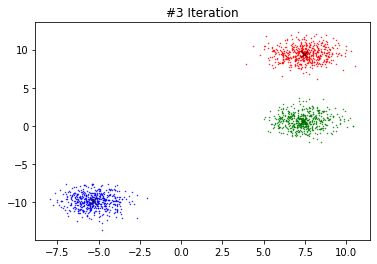

In [12]:
k = 3
MAX_ITERATIONS = 9
centroids, iterations = kmeans(blobs, k)
plotDataSet(f"#{iterations} Iteration", blobs, getLabels(blobs, centroids), centroids)

[array([ 7.26946955, 10.98320369]), array([ 7.32252126, 10.45661816]), array([8.48385454, 9.82747089])]


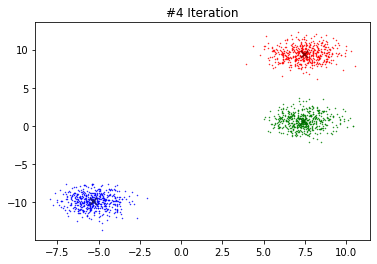

In [18]:
k = 3
MAX_ITERATIONS = 9999
centroids, iterations = kmeans(blobs, k)
plotDataSet(f"#{iterations} Iteration", blobs, getLabels(blobs, centroids), centroids)

What do you notice about the predicted clusters as algorithm progresses?

**The predicted clusters would shift around before settling down in the three groups. This didn't take as long as I suspected, probably because the intial randomization of the centroids used actual data points, and the points are pretty evenly distributed.**

**The third plot (unlimitied iterations) was actually pretty good about finding the correct clusters in ~4 iterations, but I like the plot it is on right now--it shows a local minimum, where the red plot covers both of the clusters on the right side of the graph.**

Does the number of centroids, k=3 fit the data?

**Yep**

Discuss the quality of the clustering.

**Piece of cake. All three clusters were quite distinct from one another, and there wasn't any noisy data in the plot.**

## Exercise 3
Generate a dataset called noisy moons with the following code:

In [14]:
from sklearn import datasets
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


[array([ 0.45223077, -0.35234548]), array([0.09551012, 0.17191415]), array([ 1.4923721 , -0.42537249])]


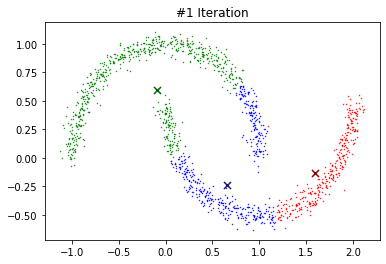

In [15]:
k = 3
MAX_ITERATIONS = 0
centroids, iterations = kmeans(noisy_moons, k)
plotDataSet(f"#{iterations} Iteration", noisy_moons, getLabels(noisy_moons, centroids), centroids)

[array([1.90809355, 0.18018725]), array([ 1.38665286, -0.31251324]), array([-0.71909045,  0.75543376])]


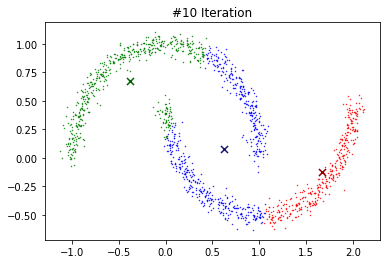

In [16]:
k = 3
MAX_ITERATIONS = 9
centroids, iterations = kmeans(noisy_moons, k)
plotDataSet(f"#{iterations} Iteration", noisy_moons, getLabels(noisy_moons, centroids), centroids)

[array([0.85096944, 0.44425345]), array([-0.69720723,  0.83236407]), array([0.12138241, 0.13118455])]


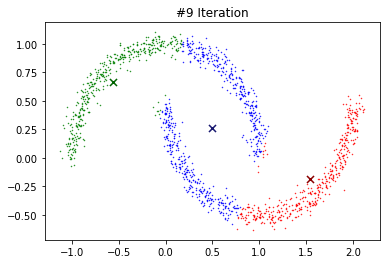

In [17]:
k = 3
MAX_ITERATIONS = 99999
centroids, iterations = kmeans(noisy_moons, k)
plotDataSet(f"#{iterations} Iteration", noisy_moons, getLabels(noisy_moons, centroids), centroids)

What do you notice about the predicted clusters as algorithm progresses?

**These clusters would gravitate to a left cluster, middle cluster, and right cluster. This would take ~25 iterations to hit this point.**

Does the number of centroids, k=3 fit the data?

**Not really.**

Discuss the quality of the clustering.

**There are two distinct groupings--the moon shapes--present in the data, but k=2 also wouldn't be a good fit since the centroids can't express the complicated moon shape, only rough circles around data points.**

## Exercise 4
Discuss what you learned below

**I mean, I learned how to do this? Does that count? :) This algorithm is so cool. I know it's not perfect (as the moon example demonstrates) but it was fascinating to see something so simple do a pretty dang good job about predicting the clusters in data (no derivatives necessary). It learned the clusters faster than I was expecting, too. Granted, I wasn't being totally "random" when I initialized the centroids, and the data is pretty much perfect for this set-up, but it really only took 3 or 4 iterations to settle down.**